<a href="https://www.kaggle.com/code/aniruddhapa/bitcoin-price-forecasting-using-fb-prophet?scriptVersionId=194308685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Timeseries forecasting using FB Prophet** #

**`fbprophet`**, now known as **`prophet`**, is a forecasting tool developed by Facebook's Core Data Science team. It is designed for time series data and is particularly well-suited for cases where the data exhibits strong seasonal patterns and trends. Prophet is known for its simplicity, robustness, and ability to handle missing data and outliers effectively.

### Key Features
- **Automatic Handling of Seasonality**: Prophet automatically detects and models daily, weekly, and yearly seasonality, making it ideal for time series data with regular seasonal effects.
- **Trend Detection**: The model can capture linear or logistic growth trends, allowing it to adjust to changing trends over time.
- **Holiday Effects**: Users can incorporate custom holiday effects to account for special events or anomalies in the data.
- **Robust to Missing Data**: Prophet can handle missing data points without requiring complex imputation methods.
- **Intuitive Parameter Tuning**: It offers a straightforward interface for adjusting model parameters, making it accessible for users with varying levels of expertise.

## Why fbprophet for Bitcoin Closing Price Forecasting?

**1. Handling Seasonality and Trends**
   - Bitcoin prices often exhibit seasonal patterns and trends, influenced by market cycles and external factors. Prophet’s ability to model and adjust for these seasonality components makes it a strong candidate for capturing such patterns in Bitcoin closing prices.

**2. Ease of Use**
   - Prophet is designed to be user-friendly and requires minimal parameter tuning. Its intuitive interface allows you to quickly fit the model and generate forecasts, which is ideal for both exploratory analysis and production forecasting.

**3. Robustness**
   - The tool’s robustness to missing data and outliers is particularly useful in financial time series, where such issues are common. This ensures that the model remains effective even if the dataset has irregularities.

**4. Flexibility**
   - Prophet can easily incorporate holiday effects and special events, which may impact Bitcoin prices. This flexibility can enhance the accuracy of forecasts by accounting for significant market events or news.

**5. Visualization**
   - Prophet provides built-in tools for visualizing forecast components (trend, seasonality, and holidays), which helps in understanding the model's behavior and interpreting the results effectively.

## Summary
**`fbprophet`** is a powerful and user-friendly tool for time series forecasting, making it well-suited for predicting Bitcoin closing prices. Its ability to handle seasonality, trends, and missing data, combined with its ease of use, makes it a strong choice for developing reliable forecasts in your Kaggle notebook.


In [1]:
import pandas as pd
import numpy as np
import fbprophet
import warnings
warnings.filterwarnings('ignore')
bitdf=pd.read_csv('../input/bitcoin-price-dataset-from-sept-2014-to-oct-2021/BTC-USD.csv')
bitdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [2]:
bitdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2587 non-null   object 
 1   Open       2583 non-null   float64
 2   High       2583 non-null   float64
 3   Low        2583 non-null   float64
 4   Close      2583 non-null   float64
 5   Adj Close  2583 non-null   float64
 6   Volume     2583 non-null   float64
dtypes: float64(6), object(1)
memory usage: 141.6+ KB


In [3]:
bitdf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2.583000e+03
mean,9400.048053,9668.502386,9114.186078,9422.977756,9422.977756,1.373455e+10
std,13775.684391,14194.890140,13319.523448,13812.089925,13812.089925,1.989676e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,577.671997,582.812988,573.377502,577.486481,577.486481,7.401720e+07
50%,5466.524414,5633.802246,5295.877930,5505.283691,5505.283691,4.553270e+09
75%,9693.365235,9896.820312,9492.367188,9695.651367,9695.651367,2.218633e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [4]:
bitdf.shape

(2587, 7)

> We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe.

In [5]:
from fbprophet import Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [6]:
bitdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [7]:
### Considering the closing price only for the Forecasting and creating a new dataframe
newdf=bitdf[['Date','Close']]
newdf.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [8]:
### Addressing the null values
newdf.isnull().sum()

Date     0
Close    4
dtype: int64

In [9]:
newdf=newdf.dropna()

In [10]:
newdf.shape

(2583, 2)

In [11]:
### Changing the column names

newdf.columns=["ds","y"]

In [12]:
newdf.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [13]:
### converting the datatype to datetime
newdf['ds']=pd.to_datetime(newdf['ds'])

In [14]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583 entries, 0 to 2586
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2583 non-null   datetime64[ns]
 1   y       2583 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.5 KB


<AxesSubplot:>

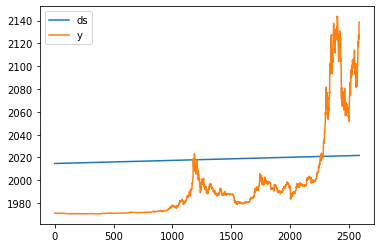

In [15]:
newdf.plot()

In [16]:
### initialize the model
model= Prophet()
model.fit(newdf)

Initial log joint probability = -198.578


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5324.56     0.0322542       551.482           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5407.71     0.0567488       304.459           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5419.51    0.00546273       186.151      0.1375           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5427.83   0.000478966       70.5854      0.3289      0.3289      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     432       5433.27   0.000601715       228.065   3.852e-06       0.001      577  LS failed, Hessian reset 
     499       5439.44    0.00135557       71.0293      0.7746      0.7746      6

In [17]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [18]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
#create future dates of 365 days
future_dates=model.make_future_dataframe(periods=730)

In [20]:
future_dates

,ds
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
3308,2023-10-12
3309,2023-10-13
3310,2023-10-14
3311,2023-10-15


In [21]:
### Prediction
prediction=model.predict(future_dates)

In [22]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,222.684977,-7602.304679,3223.786493,222.684977,222.684977,-2373.356322,-2373.356322,-2373.356322,-8.523416,-8.523416,-8.523416,-2364.832905,-2364.832905,-2364.832905,0.0,0.0,0.0,-2150.671345
1,2014-09-18,222.435048,-7928.070118,2950.894669,222.435048,222.435048,-2437.498040,-2437.498040,-2437.498040,-29.252766,-29.252766,-29.252766,-2408.245275,-2408.245275,-2408.245275,0.0,0.0,0.0,-2215.062992
2,2014-09-19,222.185119,-7912.632988,3274.731161,222.185119,222.185119,-2390.276932,-2390.276932,-2390.276932,53.902576,53.902576,53.902576,-2444.179508,-2444.179508,-2444.179508,0.0,0.0,0.0,-2168.091813
3,2014-09-20,221.935190,-7784.879654,3089.266290,221.935190,221.935190,-2440.777144,-2440.777144,-2440.777144,31.420600,31.420600,31.420600,-2472.197745,-2472.197745,-2472.197745,0.0,0.0,0.0,-2218.841954
4,2014-09-21,221.685261,-7904.482776,2942.247263,221.685261,221.685261,-2510.390573,-2510.390573,-2510.390573,-18.435661,-18.435661,-18.435661,-2491.954911,-2491.954911,-2491.954911,0.0,0.0,0.0,-2288.705312


In [23]:
newdf.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [24]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].sample(40)

,ds,yhat,yhat_lower,yhat_upper
1047,2017-07-30,3098.773190,-2635.005378,8588.423916
585,2016-04-24,2886.947426,-2223.402263,8732.852100
2318,2021-01-25,31583.054231,25807.487788,36972.375144
2185,2020-09-11,16325.798902,10374.275117,21704.446175
509,2016-02-08,1825.669773,-3896.717008,7483.077207
2293,2020-12-31,29811.761061,24019.989540,35201.823799
2469,2021-06-25,43624.471242,38124.084355,49287.028417
1356,2018-06-04,6566.920880,1085.260486,11752.339457
2465,2021-06-21,43423.201891,37732.132549,49103.889450
372,2015-09-24,-2208.089008,-7786.428610,3308.518011


# Plotting the Forecasts

**Prophet has inbuilt feature that enables to plot the forecasts.
The blue line is the forecasted trend and the black dots are represents the actual data.**

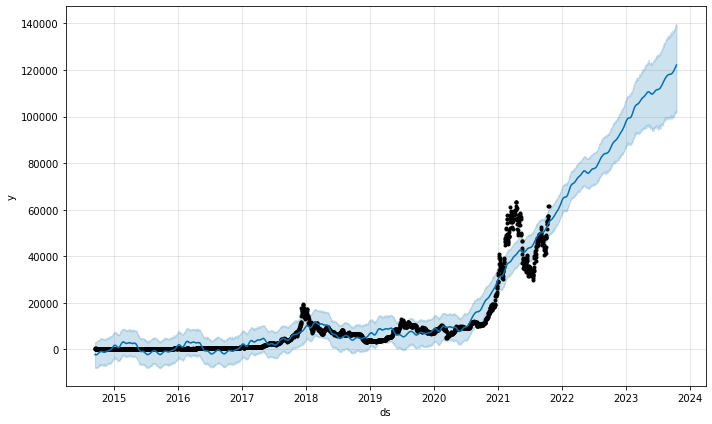

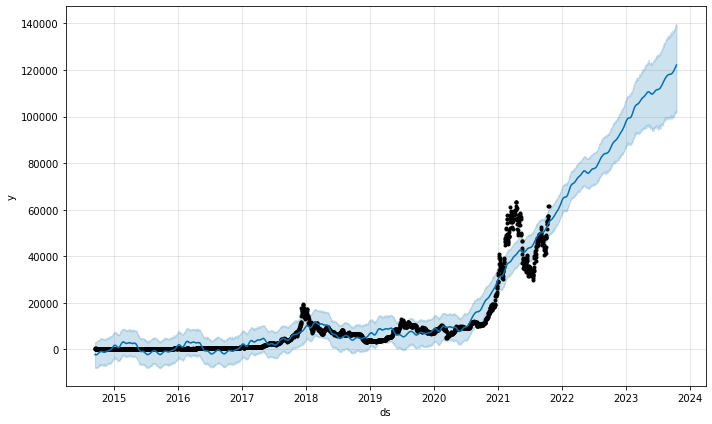

In [25]:
model.plot(prediction)

# Visualize each components [Trends, Weekly]

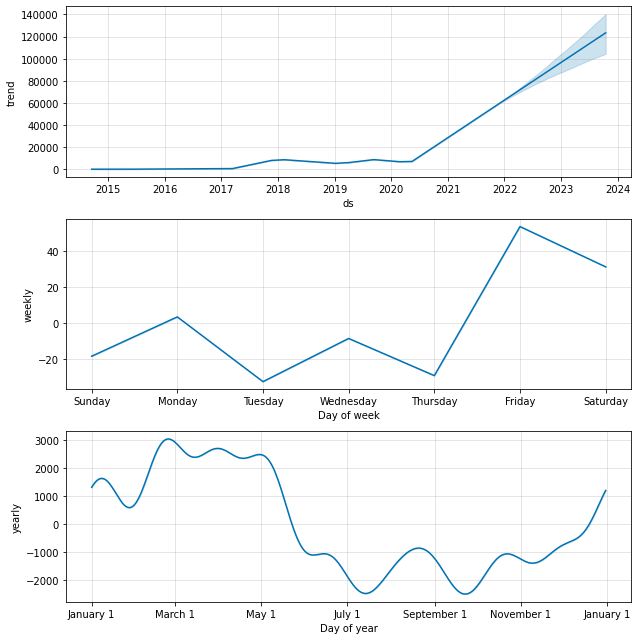

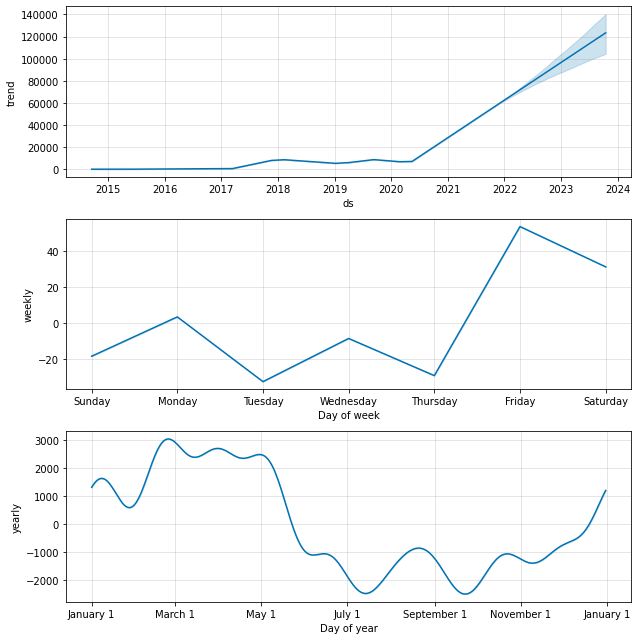

In [26]:
model.plot_components(prediction)

# Cross Validation

Now, lets measure the forecast error using the historical data by comparing the predicted values with actual values.
In order to perform this we select cut off points in the history of the data and fit the model with data upto that cut off point.

Then we compare the actual values and the predicted values.

In [27]:
##Cross Validation

from fbprophet.diagnostics import cross_validation

In [28]:
df_cv=cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

  0%|          | 0/7 [00:00<?, ?it/s]

Initial log joint probability = -108.971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3291.14     0.0940197       1089.68          10           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3368.56     0.0266127       1153.15      0.3219           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3398.46   0.000244745       133.364           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       3401.04   6.17864e-05       162.445   3.257e-07       0.001      437  LS failed, Hessian reset 
     371       3404.12   2.89976e-05       71.8357    2.64e-07       0.001      521  LS failed, Hessian reset 
     399       3405.26    0.00106386       188.738           1           1      556   
    Iter      log pro

In [29]:
df_cv.sample(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
2235,2020-12-09,10232.903425,8856.953035,11622.467167,18553.916016,2020-10-16
2496,2021-08-27,11273.147230,5895.111532,16196.097443,49058.667969,2020-10-16
1777,2020-09-06,14789.462763,9078.859656,20490.475832,10280.351563,2019-10-22
1421,2020-03-17,-783.802182,-7865.804212,6387.827023,5225.629395,2019-04-25
1251,2019-09-29,1362.524454,-1127.661996,3758.654296,8104.185547,2019-04-25
1182,2019-07-22,2627.096378,1192.169789,4011.228850,10343.106445,2019-04-25
2294,2021-02-06,9367.530961,7629.557639,10971.076960,39266.011719,2020-10-16
2259,2021-01-02,10097.271241,8611.489901,11491.006972,32127.267578,2020-10-16
2027,2020-11-16,11647.200249,8716.303004,14306.523728,16716.111328,2020-04-19
494,2018-09-07,15108.250414,13415.681123,16992.851911,6467.069824,2018-04-30


In [30]:
from fbprophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,1.210796e+07,3479.649533,2790.248269,0.305573,0.269005,0.259843
1,38 days,1.289275e+07,3590.647914,2871.502236,0.311257,0.271369,0.260967
2,39 days,1.374771e+07,3707.791010,2959.145304,0.317995,0.276107,0.260967
3,40 days,1.468859e+07,3832.569587,3054.903884,0.325996,0.281335,0.260967
4,41 days,1.559727e+07,3949.337598,3149.965222,0.335041,0.283669,0.260967
...,...,...,...,...,...,...,...
324,361 days,5.719423e+08,23915.315340,18190.779725,1.218796,0.880581,0.239033
325,362 days,5.757402e+08,23994.587574,18233.158803,1.216201,0.897383,0.239033
326,363 days,5.802819e+08,24089.041239,18291.385995,1.213271,0.933094,0.239033
327,364 days,5.849929e+08,24186.627329,18351.853666,1.210249,0.948415,0.239033


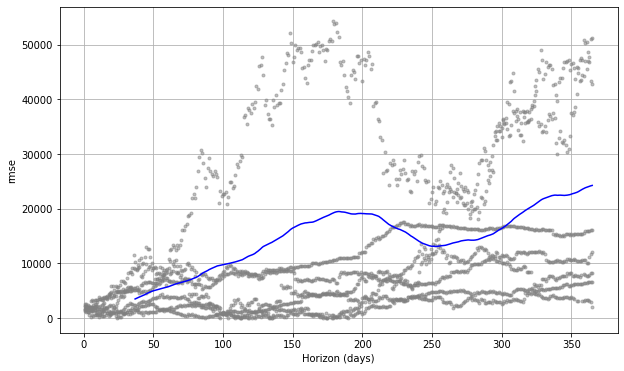

In [31]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')